autoencoder: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798 \
autoencoder: https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%203%20-%20Autoencoders.ipynb \
Unet: https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5 \
Convolutional autoencoder maths: https://pgaleone.eu/neural-networks/2016/11/24/convolutional-autoencoders/ \
Convolutional autoencoder code: https://blog.keras.io/building-autoencoders-in-keras.html

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import os, os.path
from keras import layers
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from IPython.display import clear_output

In [7]:
#SIMPLE AUTOENCODER

In [110]:
numberOfFiles=0
try: 
    filesXtrain = os.listdir('../TrainingDataset/x_train/'); 
    filesXtrainLines = os.listdir('../TrainingDataset/x_train_lines/'); 
    if len(filesXtrain)>len(filesXtrainLines): 
        numberOfFiles=len(filesXtrainLines); 
    else: numberOfFiles=len(filesXtrain)   
except: None
numberOfFiles-=1
testingSetSize = 20
mx_train_lines = np.zeros((numberOfFiles-testingSetSize,20,144))
mx_train = np.zeros((numberOfFiles-testingSetSize,20,144))
mx_test_lines = np.zeros((testingSetSize,20,144))
mx_test = np.zeros((testingSetSize,20,144))

for i in range(0,numberOfFiles-testingSetSize):
    mx_train_lines[i] = np.load('../TrainingDataset/x_train_lines/indicatorVariationArrayLocalTime{}.npy'.format(i))
    mx_train[i] = np.load('../TrainingDataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))
for i in range(numberOfFiles-testingSetSize,numberOfFiles):
    mx_test_lines[i-(numberOfFiles-testingSetSize)-1] = np.load('../TrainingDataset/x_train_lines/indicatorVariationArrayLocalTime{}.npy'.format(i))
    mx_test[i-(numberOfFiles-testingSetSize)-1] = np.load('../TrainingDataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))


# for i in range(0,90):
#     mx_train_lines[i] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train_lines/indicatorVariationArrayLocalTime{}.npy'.format(i))
#     mx_train[i] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))

# for i in range(90,100):
#     mx_test_lines[i-90] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train_lines/indicatorVariationArrayLocalTime{}.npy'.format(i))
#     mx_test[i-90] = np.load('../../../../media/cristille/PL_EXTHD1/IRAP/Training_Dataset/x_train/indicatorVariationArrayLocalTime{}.npy'.format(i))

mx_train_lines=np.nan_to_num(mx_train_lines)
mx_train=np.nan_to_num(mx_train)
mx_test_lines=np.nan_to_num(mx_test_lines)
mx_test=np.nan_to_num(mx_test)
# mx_train = mx_train.reshape((len(mx_train), np.prod(mx_train.shape[1:])))
# mx_train_lines = mx_train_lines.reshape((len(mx_train_lines), np.prod(mx_train_lines.shape[1:])))

In [56]:
def makeLines(array):
    lineStart=5
    lineEnd=10
    arrayLines=np.empty_like(array)
    for i in range(lineStart, lineEnd):
        arrayLines[i] = np.zeros_like(array.shape[1])
    return arrayLines

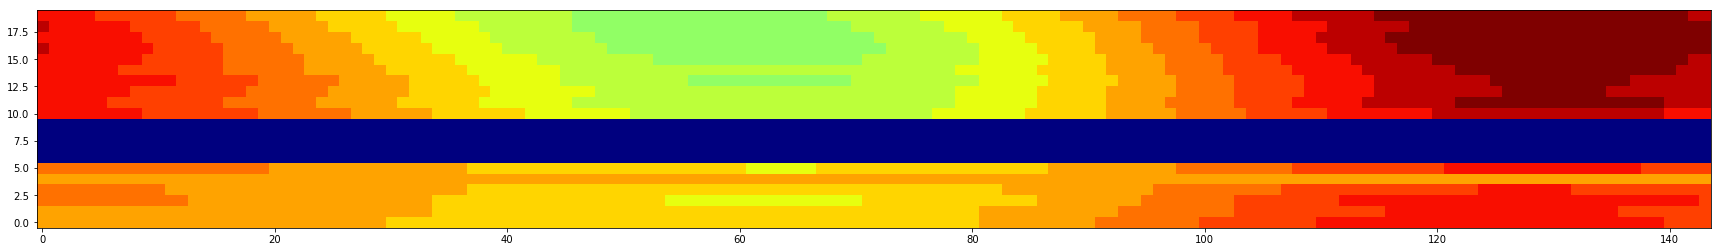

In [111]:
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_train_lines[50], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

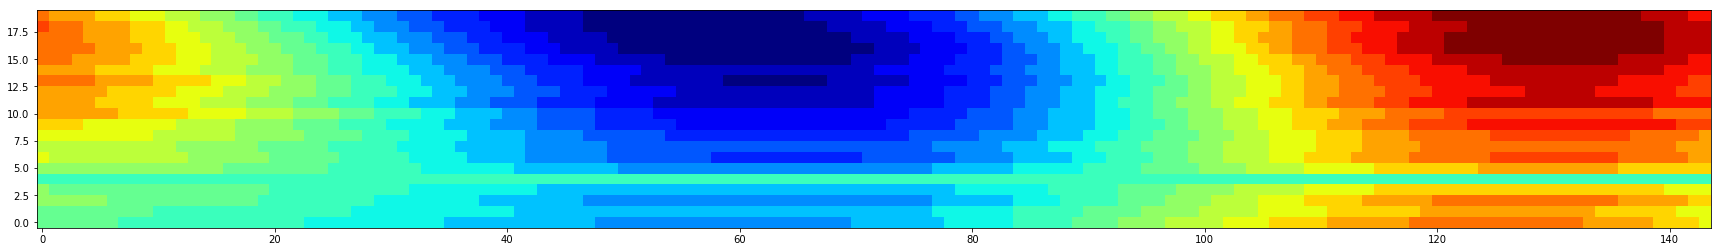

In [112]:
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_train[50], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

In [96]:
input_size = 2880
hidden_size = 1440
hidden2_size = 720
code_size = 32

input_img = Input(shape=(2880,))
x = Dense(hidden_size, activation='relu')(input_img)
x = Dense(hidden2_size, activation='relu')(x)
code = Dense(code_size, activation='relu')(x)
x = Dense(hidden2_size, activation='relu')(code)
x = Dense(hidden_size, activation='relu')(x)
output_img = Dense(input_size, activation='sigmoid')(x)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(mx_train_lines, mx_train, epochs=10)

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6905
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6847
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6823
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6816
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6807
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6790
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6785
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6726
Epoch 9/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6662
Epoch 10/50
313/313 [==============================] - 1s 3ms/step - loss: 0.6036
Epoch 11/50
313/313 [==============================] - 1s 3ms/step - loss: 0.4325
Epoch 12/50
313/313 [==============================] - 1s 3ms/step - loss: -0.7276
Epoch 13/50
313/313 [===

In [105]:
testMatrixNumber=8

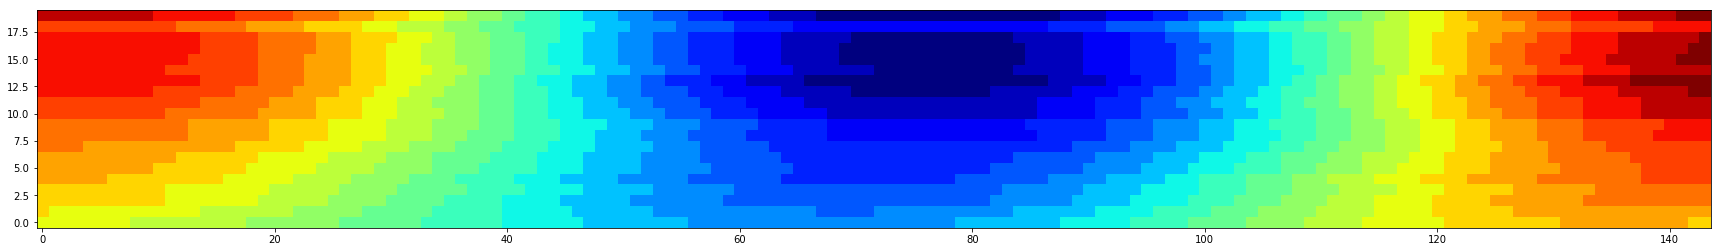

In [106]:
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_test[testMatrixNumber].reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

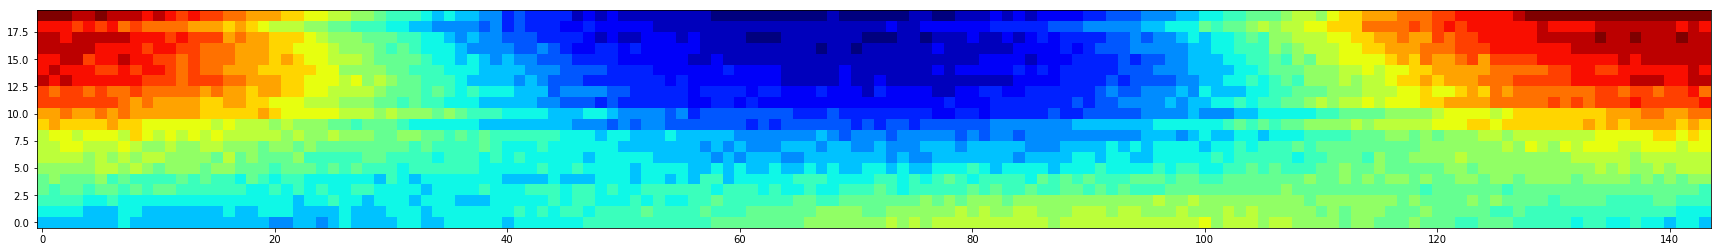

In [107]:
fig= plt.figure(figsize=(30,4))
plt.imshow(autoencoder.predict(mx_test_lines[testMatrixNumber].reshape(1,-1)).reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')

In [189]:
mx_train_lines = np.squeeze(mx_train_lines,3)
mx_train = np.squeeze(mx_train,3)

In [243]:
#CONVOLUTIONAL AUTOENCODER

input_img = keras.Input(shape=(20, 144, 1))

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 1), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convolutional_autoencoder = keras.Model(input_img, decoded)
convolutional_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [244]:
convolutional_autoencoder._get_distribution_strategy = lambda: None
convolutional_autoencoder.fit(mx_train_lines, mx_train, epochs=10, batch_size=50, shuffle=True)

Epoch 1/10
313/313 [==============================] - 13s 40ms/step - loss: 0.6913
Epoch 2/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6904
Epoch 3/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6874
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6759
Epoch 5/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6678
Epoch 6/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6647
Epoch 7/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6594
Epoch 8/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6473
Epoch 9/10
313/313 [==============================] - 8s 25ms/step - loss: 0.6033
Epoch 10/10
313/313 [==============================] - 8s 25ms/step - loss: 0.4017


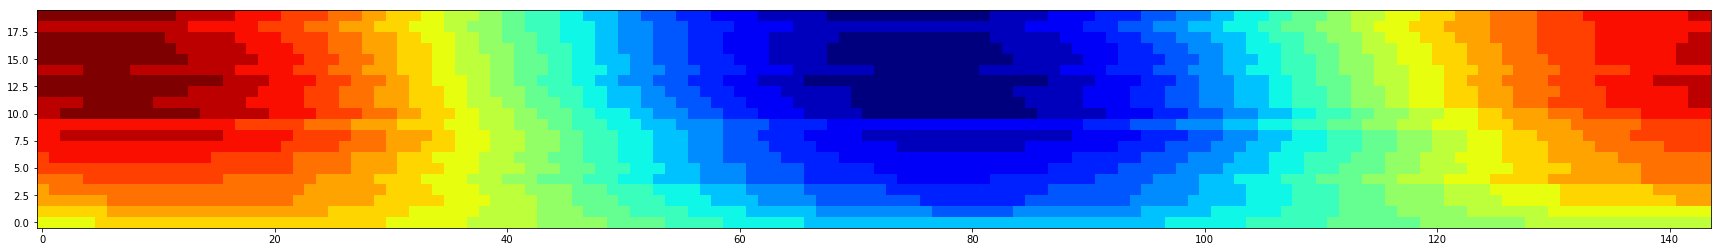

/home/cristille/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


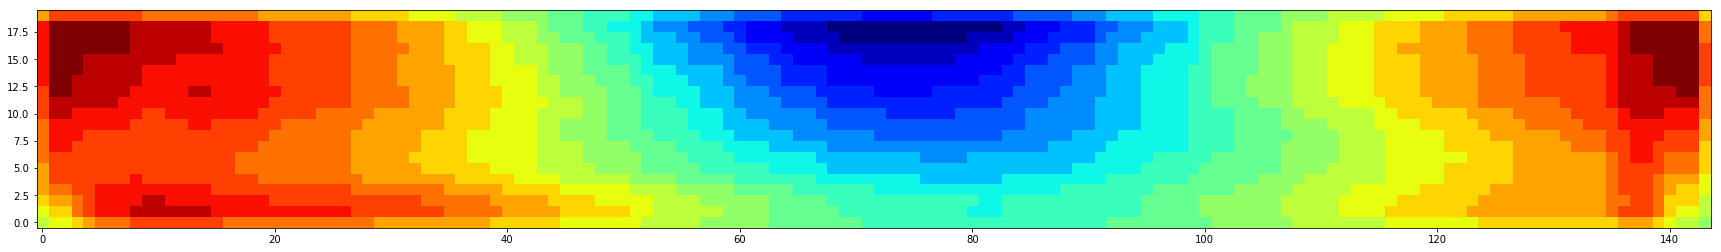

In [250]:
testMatrixNumber=13
fig= plt.figure(figsize=(30,4))
plt.imshow(mx_test[testMatrixNumber], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
plt.show()
fig= plt.figure(figsize=(30,4))
plt.imshow(convolutional_autoencoder.predict(np.expand_dims(np.expand_dims(mx_test_lines[testMatrixNumber], 3), 0)).reshape(20,144), origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
plt.show()